### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

sys.path.append("..")
import helper as hp

In [3]:
df = pd.read_excel("/Users/michaelmoret/Desktop/Externa/data/pulling/22-02-24/20240222_WAX4concentrationsx100.xlsx")
df.head(6)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,MPa/%,g,mm,NaN,NaN,NaN
1,NaN,NaN,Gradient St-Strain 1:2,Break Force,Distance to Break,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Start Batch 20240222_bleach_WAX4_0.02mgml_,20240222_bleach_WAX4_0.02mgml_,NaN,NaN,NaN,NaN,NaN,NaN
4,20240222_bleach_WAX4_0.02mgml_1,20240222_bleach_WAX4_0.02mgml_,68.962,135.404,-25.595,66.0,64.0,ok
5,20240222_bleach_WAX4_0.02mgml_2,20240222_bleach_WAX4_0.02mgml_,54.053,63.72,-1.682,45.0,45.0,early


In [4]:
TYPE = "Break Force"

In [5]:
df = df.rename(columns={'Unnamed: 5': 'Diameter 1', 
                        'Unnamed: 6': 'Diameter 2',
                        'Unnamed: 7': 'Note'})
df.head(2)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Diameter 1,Diameter 2,Note
0,NaN,NaN,MPa/%,g,mm,NaN,NaN,NaN
1,NaN,NaN,Gradient St-Strain 1:2,Break Force,Distance to Break,NaN,NaN,NaN


In [6]:
df = df.dropna()
df.head(2)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Diameter 1,Diameter 2,Note
4,20240222_bleach_WAX4_0.02mgml_1,20240222_bleach_WAX4_0.02mgml_,68.962,135.404,-25.595,66.0,64.0,ok
5,20240222_bleach_WAX4_0.02mgml_2,20240222_bleach_WAX4_0.02mgml_,54.053,63.72,-1.682,45.0,45.0,early


In [7]:
df['Break Force'] = df['Break Force'].astype(float)
df['Young\'s Modulus'] = df['Young\'s Modulus'].astype(float)
df['Distance to Break'] = df['Distance to Break'].astype(float)
#df['Toughness'] = df['Toughness'].astype(float)
df['Diameter 1'] = df['Diameter 1'].astype(float)
df['Diameter 2'] = df['Diameter 2'].astype(float)
#df['Humidity'] = df['Humidity'].astype(float)

df.head(2)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Diameter 1,Diameter 2,Note
4,20240222_bleach_WAX4_0.02mgml_1,20240222_bleach_WAX4_0.02mgml_,68.962,135.404,-25.595,66.0,64.0,ok
5,20240222_bleach_WAX4_0.02mgml_2,20240222_bleach_WAX4_0.02mgml_,54.053,63.720,-1.682,45.0,45.0,early


In [8]:
df = df[df['Test ID'] != 'Average:']
df = df[df['Test ID'] != 'S.D.']
df = df[df['Test ID'] != 'Coef. of Variation']

In [9]:
df['Average'] = ((df['Diameter 1'] + df['Diameter 2']) / 2 )/1000
df['Area'] = math.pi * (df['Average'] / 2)**2

In [10]:
df['Baseline area'] = math.pi * 0.035**2
df['Updated Young\'s Modulus'] = df['Young\'s Modulus'] * (df['Baseline area'] / df['Area'])

In [11]:
df['Break stress'] = df['Break Force'] / df['Area'] / 1000

In [12]:
df.head(2)

,Test ID,Batch,Young's Modulus,Break Force,Distance to Break,Diameter 1,Diameter 2,Note,Average,Area,Baseline area,Updated Young's Modulus,Break stress
4,20240222_bleach_WAX4_0.02mgml_1,20240222_bleach_WAX4_0.02mgml_,68.962,135.404,-25.595,66.0,64.0,ok,0.065,0.003318,0.003848,79.979598,40.805143
5,20240222_bleach_WAX4_0.02mgml_2,20240222_bleach_WAX4_0.02mgml_,54.053,63.720,-1.682,45.0,45.0,early,0.045,0.001590,0.003848,130.794914,40.064604


<Figure size 1000x600 with 0 Axes>

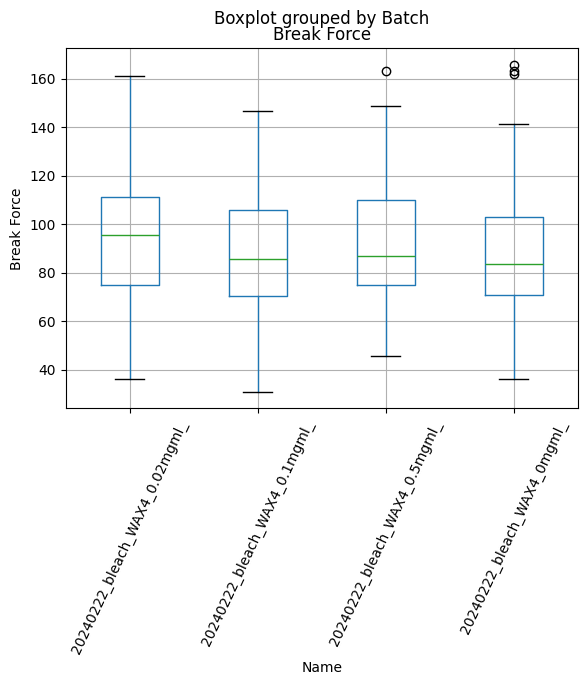

In [13]:
def do_plot(df):
    plt.figure(figsize=(10, 6))
    df.boxplot(column=TYPE, by='Batch')
    plt.xlabel('Name')
    plt.ylabel(TYPE)
    plt.xticks(rotation=65)
    ## y axis from 20 to 90
    #plt.ylim(15, 90)
    plt.show()
    

do_plot(df)


In [14]:
std_by_batch_all = df.groupby('Batch')[TYPE].std()
print(std_by_batch_all)

Batch
20240222_bleach_WAX4_0.02mgml_    25.068611
20240222_bleach_WAX4_0.1mgml_     23.967990
20240222_bleach_WAX4_0.5mgml_     24.760355
20240222_bleach_WAX4_0mgml_       26.083783
Name: Break Force, dtype: float64


In [15]:
count = len(df[df['Batch'].str.contains('0mg')])
print(count)

100


In [16]:
hp.get_pvalue_and_sample_size(df, TYPE)

(                                20240222_bleach_WAX4_0.02mgml_  \
 20240222_bleach_WAX4_0.02mgml_                           1.000   
 20240222_bleach_WAX4_0.1mgml_                            0.151   
 20240222_bleach_WAX4_0.5mgml_                            0.613   
 20240222_bleach_WAX4_0mgml_                              0.062   
 
                                 20240222_bleach_WAX4_0.1mgml_  \
 20240222_bleach_WAX4_0.02mgml_                          0.151   
 20240222_bleach_WAX4_0.1mgml_                           1.000   
 20240222_bleach_WAX4_0.5mgml_                           0.351   
 20240222_bleach_WAX4_0mgml_                             0.713   
 
                                 20240222_bleach_WAX4_0.5mgml_  \
 20240222_bleach_WAX4_0.02mgml_                          0.613   
 20240222_bleach_WAX4_0.1mgml_                           0.351   
 20240222_bleach_WAX4_0.5mgml_                           1.000   
 20240222_bleach_WAX4_0mgml_                             0.198   
 

In [17]:
unique_values = df['Note'].unique()
print(unique_values)

['ok' 'early' 'breaakend tape' 'earlyish (middle bias)' 'breakend '
 'breakend paper' 'breakend' 'slip? Breakend' 'breakend (early ish)'
 'early?' 'breakend almost' 'breakend (tape)' 'early middle bias  '
 'breakend top' 'breakend(top,tape)' 'short' 'breakend?' 'almost breakend'
 'great' 'good' 'slip' 'breakend and slip' 'amost breakend']


let's remove all but ok

In [18]:
len(df)

401

In [19]:
df = df[df['Note'].isin(['ok', 'good', 'great'])]
len(df)

200

<Figure size 1000x600 with 0 Axes>

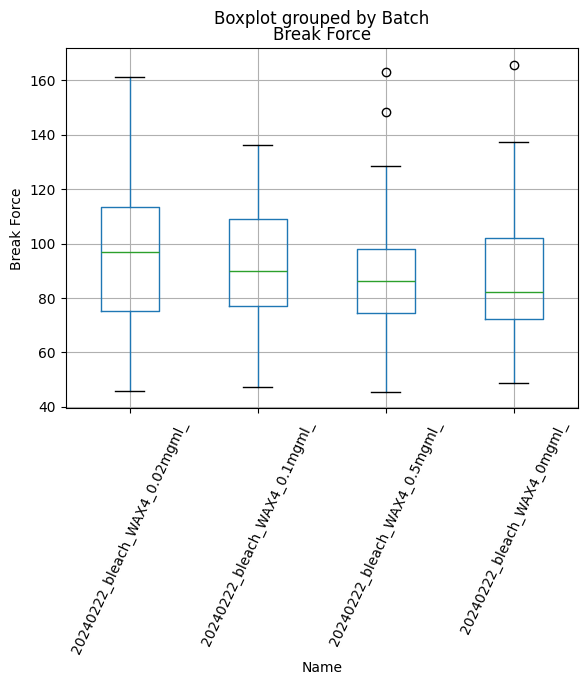

In [20]:
do_plot(df)

In [21]:
std_by_batch_ok = df.groupby('Batch')[TYPE].std()
print(std_by_batch_ok)

Batch
20240222_bleach_WAX4_0.02mgml_    24.237230
20240222_bleach_WAX4_0.1mgml_     23.680926
20240222_bleach_WAX4_0.5mgml_     23.813640
20240222_bleach_WAX4_0mgml_       22.383510
Name: Break Force, dtype: float64


In [22]:
merged_df = pd.concat([std_by_batch_all, std_by_batch_ok], axis=1)
merged_df.columns = ['std all', 'std ok']
merged_df

,std all,std ok
Batch,,
20240222_bleach_WAX4_0.02mgml_,25.068611,24.237230
20240222_bleach_WAX4_0.1mgml_,23.967990,23.680926
20240222_bleach_WAX4_0.5mgml_,24.760355,23.813640
20240222_bleach_WAX4_0mgml_,26.083783,22.383510


In [23]:
hp.get_pvalue_and_sample_size(df, TYPE)

(                                20240222_bleach_WAX4_0.02mgml_  \
 20240222_bleach_WAX4_0.02mgml_                           1.000   
 20240222_bleach_WAX4_0.1mgml_                            0.435   
 20240222_bleach_WAX4_0.5mgml_                            0.131   
 20240222_bleach_WAX4_0mgml_                              0.042   
 
                                 20240222_bleach_WAX4_0.1mgml_  \
 20240222_bleach_WAX4_0.02mgml_                          0.435   
 20240222_bleach_WAX4_0.1mgml_                           1.000   
 20240222_bleach_WAX4_0.5mgml_                           0.697   
 20240222_bleach_WAX4_0mgml_                             0.308   
 
                                 20240222_bleach_WAX4_0.5mgml_  \
 20240222_bleach_WAX4_0.02mgml_                          0.131   
 20240222_bleach_WAX4_0.1mgml_                           0.697   
 20240222_bleach_WAX4_0.5mgml_                           1.000   
 20240222_bleach_WAX4_0mgml_                             0.548   
 

more check

In [24]:
bio = df.groupby('Batch')[TYPE].mean()
print(bio)

Batch
20240222_bleach_WAX4_0.02mgml_    96.016966
20240222_bleach_WAX4_0.1mgml_     91.562425
20240222_bleach_WAX4_0.5mgml_     89.951673
20240222_bleach_WAX4_0mgml_       86.912898
Name: Break Force, dtype: float64


In [25]:
bio = df.groupby('Batch')[TYPE].median()
print(bio)

Batch
20240222_bleach_WAX4_0.02mgml_    96.9050
20240222_bleach_WAX4_0.1mgml_     89.9630
20240222_bleach_WAX4_0.5mgml_     86.0565
20240222_bleach_WAX4_0mgml_       82.0340
Name: Break Force, dtype: float64
